In [253]:
pip install numpy pandas scipy statsmodels matplotlib seaborn yfinance sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [254]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [255]:
!pip install yfinance


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [256]:
import pandas_datareader as web

In [2]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

## Loading different Dataset from Pandas Yfinance

In [4]:
# Define the ticker list
tickers = ["HINDPETRO.NS","INDIANB.NS","OIL.NS","SBICARD.NS","AUBANK.NS","EXIDEIND.NS","UPL.NS","NAM-INDIA.NS","GUJGASLTD.NS","SONACOMS.NS","LICHSGFIN.NS","RELIANCE.NS","MOTILALOFS.NS","STAR.NS","JUBLFOOD.NS",]

# Fetch the data
data = yf.download(tickers,'2015-01-01')['Adj Close']

[*********************100%%**********************]  15 of 15 completed


In [5]:
data.shape, data.dtypes

((2335, 15),
 Ticker
 AUBANK.NS        float64
 EXIDEIND.NS      float64
 GUJGASLTD.NS     float64
 HINDPETRO.NS     float64
 INDIANB.NS       float64
 JUBLFOOD.NS      float64
 LICHSGFIN.NS     float64
 MOTILALOFS.NS    float64
 NAM-INDIA.NS     float64
 OIL.NS           float64
 RELIANCE.NS      float64
 SBICARD.NS       float64
 SONACOMS.NS      float64
 STAR.NS          float64
 UPL.NS           float64
 dtype: object)

## Ploting correlation matrics 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

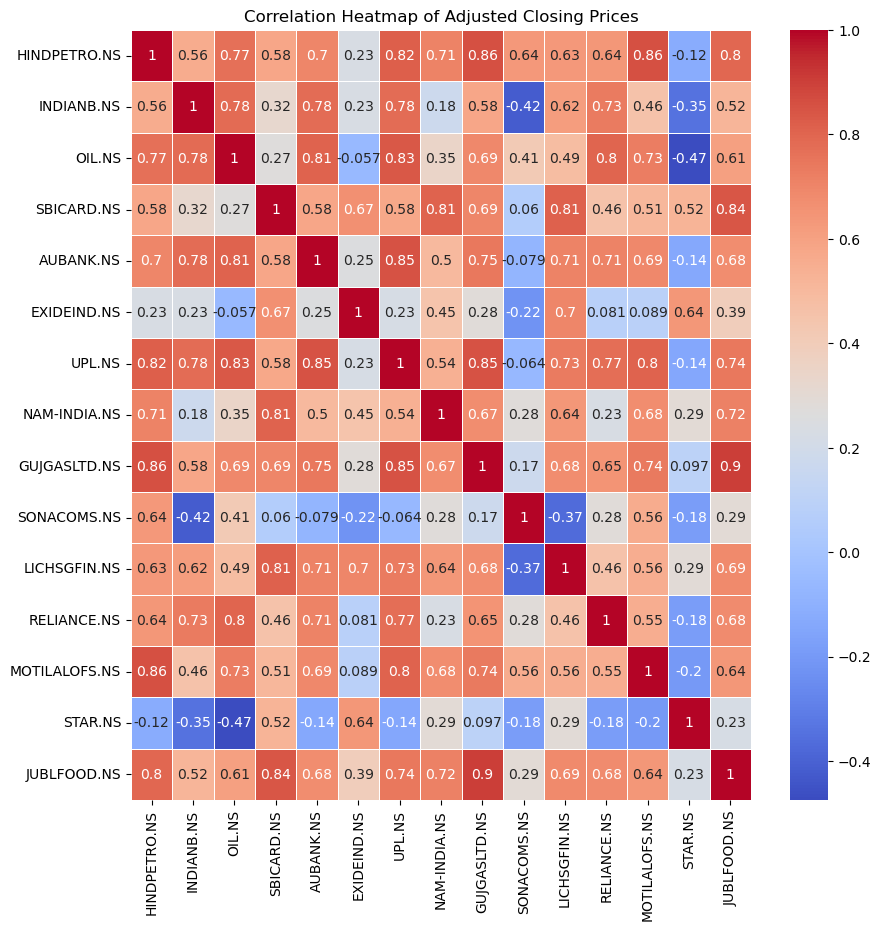

In [10]:
from datetime import datetime

def get_historical_data(tickers, start_date, end_date):
    """This function returns a DataFrame with all of the adjusted closing information."""
    combined = pd.DataFrame()
    
    for ticker in tickers:
        try:
            # Fetch the historical data
            data = yf.download(ticker, start=start_date, end=end_date)
            # Select the adjusted close price and rename the column to the ticker
            adj_close = data[['Adj Close']].rename(columns={'Adj Close': ticker})
            # Merge the data into the combined DataFrame
            if combined.empty:
                combined = adj_close
            else:
                combined = combined.join(adj_close)
        except Exception as e:
            print(f"Could not fetch data for {ticker}: {e}")
    
    return combined

# Define the list of tickers and the date range
ticks = [
    "HINDPETRO.NS",
    "INDIANB.NS",
    "OIL.NS",
    "SBICARD.NS",
    "AUBANK.NS",
    "EXIDEIND.NS",
    "UPL.NS",
    "NAM-INDIA.NS",
    "GUJGASLTD.NS",
    "SONACOMS.NS",
    "LICHSGFIN.NS",
    "RELIANCE.NS",
    "MOTILALOFS.NS",
    "STAR.NS",
    "JUBLFOOD.NS",
]

start='2020-01-01'
end="2023-01-01"


# Fetch the historical data
data = get_historical_data(ticks, start, end)


# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Adjusted Closing Prices')
plt.show()


In [11]:
tickers = ["HINDPETRO.NS", 'LICHSGFIN.NS']
# Download historical data for both stocks
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")

# Display the data
print(data.head())

[*********************100%%**********************]  2 of 2 completed

Price         Adj Close                     Close                      High  \
Ticker     HINDPETRO.NS LICHSGFIN.NS HINDPETRO.NS LICHSGFIN.NS HINDPETRO.NS   
Date                                                                          
2020-01-01   216.299576   395.911469   265.500000   431.799988   266.549988   
2020-01-02   219.558319   418.329315   269.500000   456.250000   270.649994   
2020-01-03   214.833145   402.879791   263.700012   439.399994   266.149994   
2020-01-06   199.313324   381.287109   244.649994   415.850006   260.950012   
2020-01-07   197.276611   384.587921   242.149994   419.450012   253.699997   

Price                            Low                      Open               \
Ticker     LICHSGFIN.NS HINDPETRO.NS LICHSGFIN.NS HINDPETRO.NS LICHSGFIN.NS   
Date                                                                          
2020-01-01   438.450012   263.600006   430.399994   264.899994   436.000000   
2020-01-02   457.750000   264.549988   432.649994  

<Figure size 1400x700 with 0 Axes>

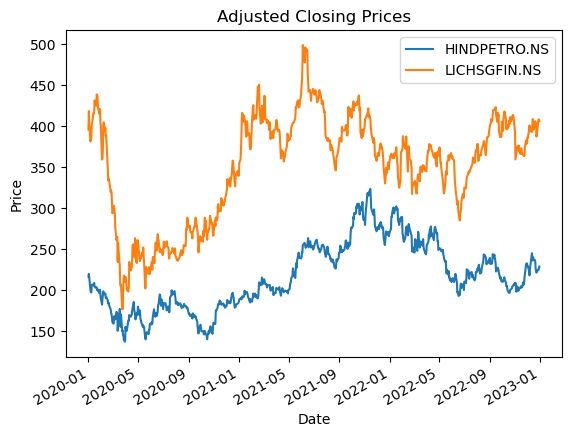

In [12]:
# Plot the adjusted closing prices
plt.figure(figsize=(14, 7))
data['Adj Close'].plot()
plt.title("Adjusted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(tickers)
plt.show();

## Plot and calulation of price ratio between `tickers`

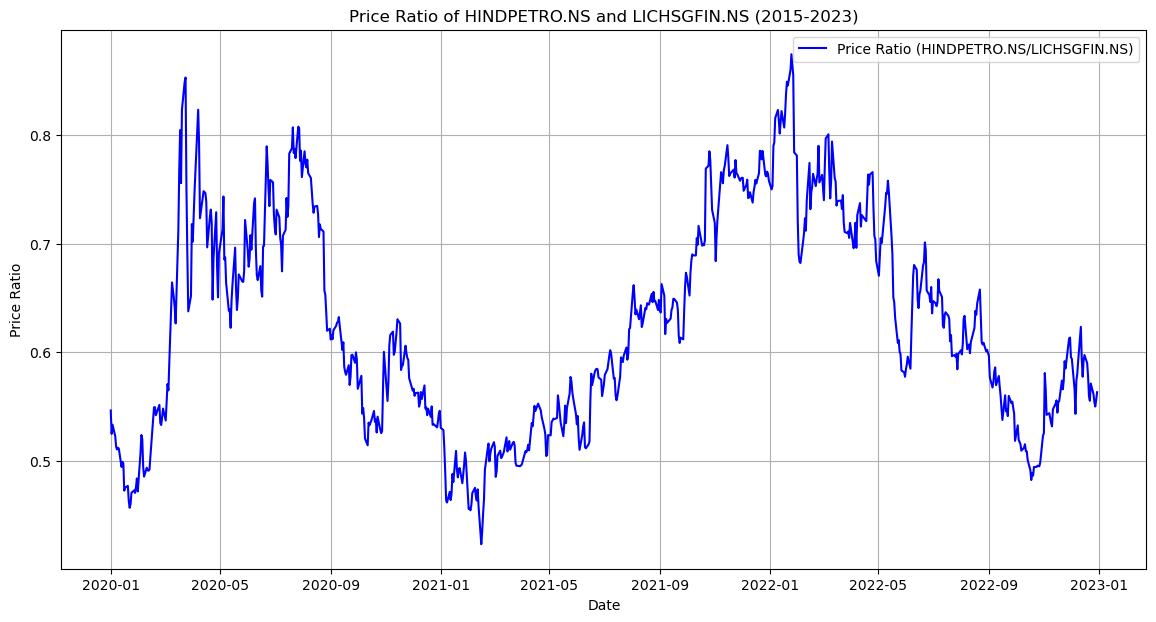

In [13]:
# Calculate the price ratio (adjusted close prices)
data['Price Ratio'] = data['Adj Close']['HINDPETRO.NS'] / data['Adj Close']['LICHSGFIN.NS']

# Plot the price ratio
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price Ratio'], label='Price Ratio (HINDPETRO.NS/LICHSGFIN.NS)', color='blue')
plt.title('Price Ratio of HINDPETRO.NS and LICHSGFIN.NS (2015-2023)')
plt.xlabel('Date')
plt.ylabel('Price Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Calculate the daily returns
returns = data['Adj Close'].pct_change()

# Calculate the spread between the two stocks
spread = returns['HINDPETRO.NS'] - returns['LICHSGFIN.NS']

# Calculate the mean and standard deviation of the spread
mean_spread = spread.mean()
std_spread = spread.std()

# Define the upper and lower thresholds
upper_threshold = mean_spread + std_spread
lower_threshold = mean_spread - std_spread

<Figure size 1400x700 with 0 Axes>

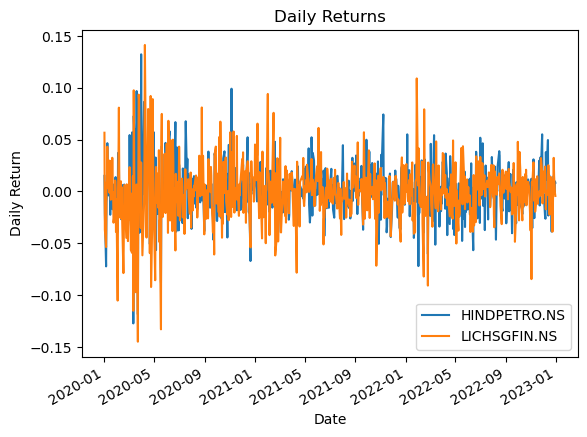

In [15]:
# Plot the daily returns
plt.figure(figsize=(14, 7))
returns.plot()
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(tickers)
plt.show()

In [16]:
# Signal generation
signals = pd.DataFrame(index=spread.index)
signals['Signal'] = 0

# Generate buy/sell signals
signals['Signal'][spread > upper_threshold] = -1  # Sell KO, Buy PEP
signals['Signal'][spread < lower_threshold] = 1   # Buy KO, Sell PEP

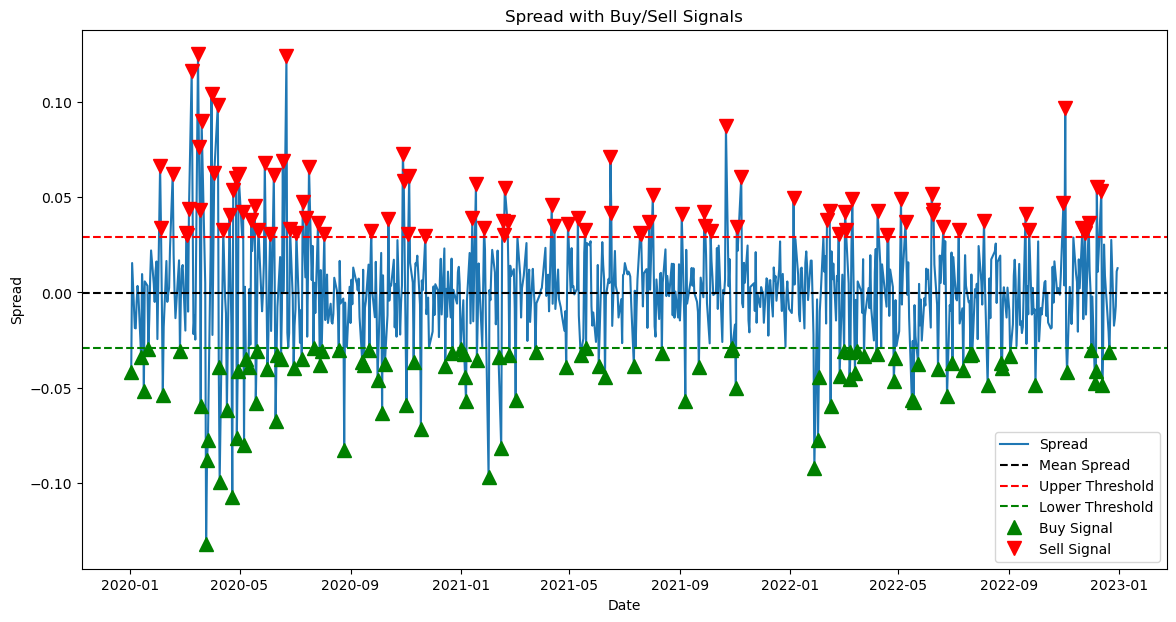

In [17]:
# Plot the spread with thresholds and signals
plt.figure(figsize=(14, 7))
plt.plot(spread.index, spread, label='Spread')
plt.axhline(mean_spread, color='black', linestyle='--', label='Mean Spread')
plt.axhline(upper_threshold, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(lower_threshold, color='green', linestyle='--', label='Lower Threshold')

# Plot buy/sell signals
plt.plot(signals.loc[signals['Signal'] == 1].index, 
         spread[signals['Signal'] == 1], 
         '^', markersize=10, color='g', label='Buy Signal')
plt.plot(signals.loc[signals['Signal'] == -1].index, 
         spread[signals['Signal'] == -1], 
         'v', markersize=10, color='r', label='Sell Signal')

plt.title("Spread with Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.show()

In [18]:
tickers

['HINDPETRO.NS', 'LICHSGFIN.NS']

In [19]:
# Calculate the price ratio (adjusted close prices)
data['Price Ratio'] = data['Adj Close']['HINDPETRO.NS'] / data['Adj Close']['LICHSGFIN.NS']

# Prepare the data for regression model
# We will use lagged values of the price ratio as features
data['Price Ratio Lagged'] = data['Price Ratio'].shift(1)

# Drop the first row since it contains NaN value after shifting
data = data.dropna()

In [20]:
# Correlation analysis
correlation = data['Adj Close']['HINDPETRO.NS'].corr(data['Adj Close']['LICHSGFIN.NS'])
print(f'Correlation between HINDPETRO.NS and LICHSGFIN.NS: {correlation}')

# Cointegration test
coint_t, p_value, _ = coint(data['Adj Close']['HINDPETRO.NS'], data['Adj Close']['LICHSGFIN.NS'])
print(f'Cointegration test p-value: {p_value}')

# Spread calculation
data['Spread'] = data['Adj Close']['HINDPETRO.NS'] - data['Adj Close']['LICHSGFIN.NS']

# Z-score calculation
data['Z-Score'] = (data['Spread'] - data['Spread'].mean()) / data['Spread'].std()

Correlation between HINDPETRO.NS and LICHSGFIN.NS: 0.6346045472565044
Cointegration test p-value: 0.426105842002393


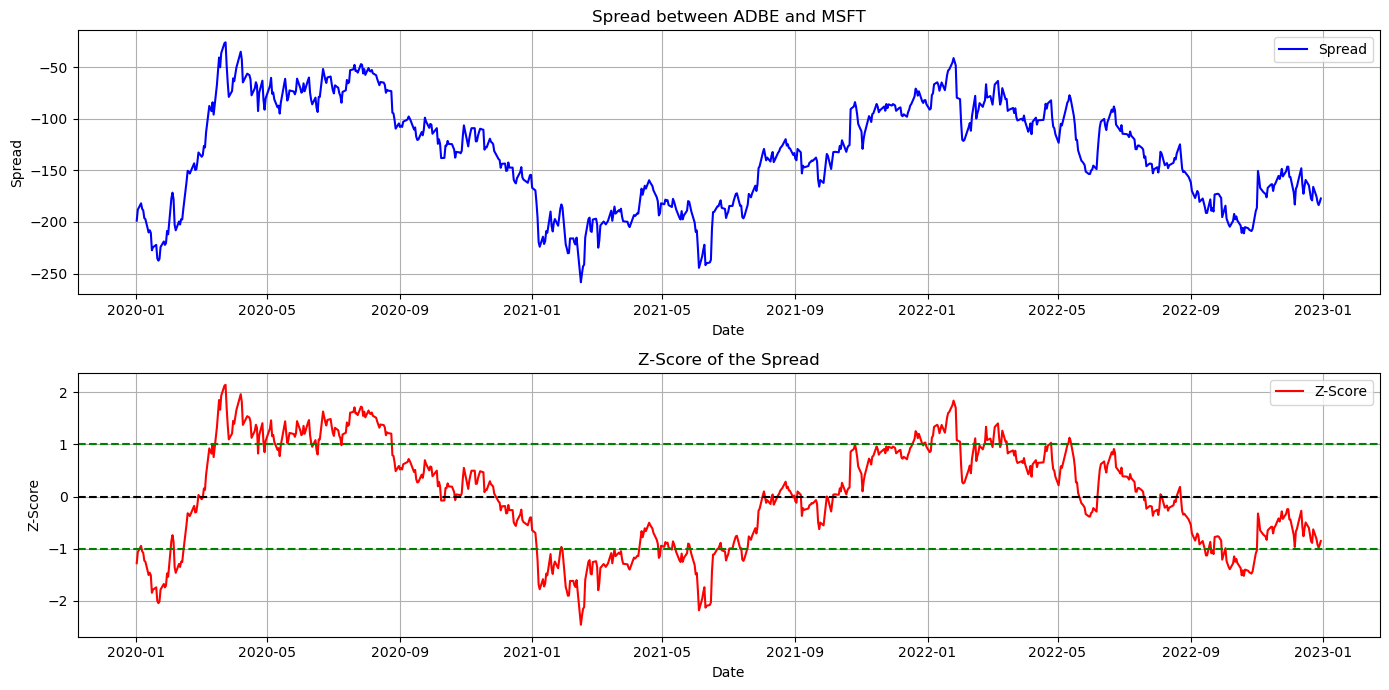

In [21]:
# Plot the spread and Z-score
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Spread'], label='Spread', color='blue')
plt.title('Spread between ADBE and MSFT')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Z-Score'], label='Z-Score', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='green', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.title('Z-Score of the Spread')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

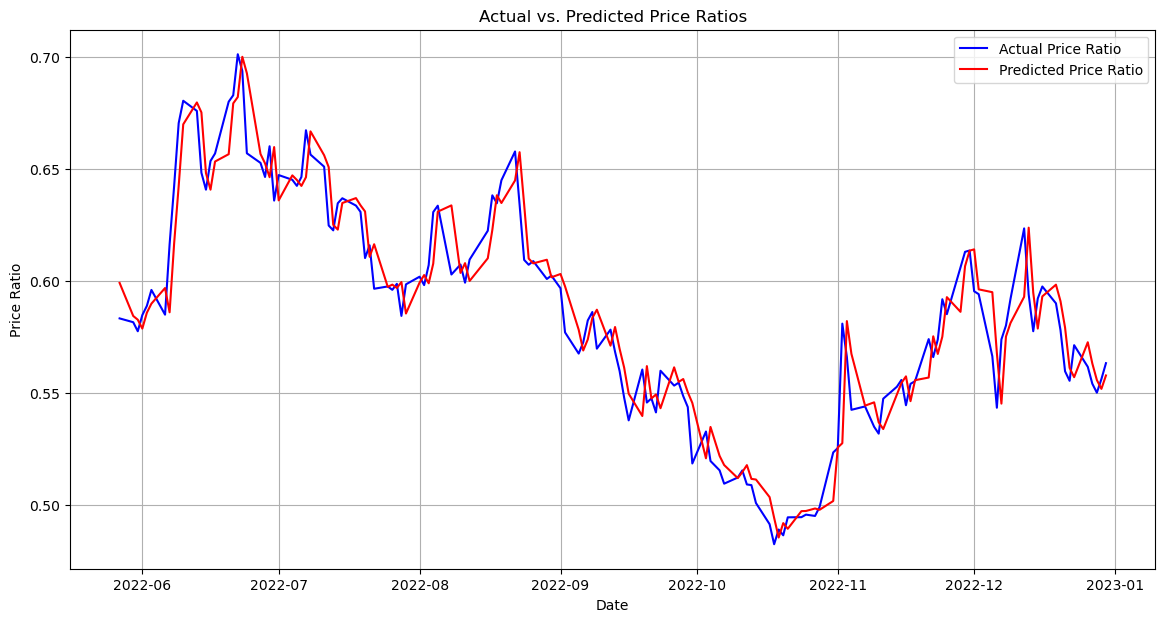

Mean Squared Error: 0.00020144449252137417
R-squared: 0.9173903641852696


In [22]:

# Split the data into training and testing sets
X = data[['Price Ratio Lagged']]
y = data['Price Ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the actual vs. predicted price ratios
plt.figure(figsize=(14, 7))
plt.plot(data.index[len(X_train):], y_test, label='Actual Price Ratio', color='blue')
plt.plot(data.index[len(X_train):], y_pred, label='Predicted Price Ratio', color='red')
plt.title('Actual vs. Predicted Price Ratios')
plt.xlabel('Date')
plt.ylabel('Price Ratio')
plt.legend()
plt.grid(True)
plt.show()

# Print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

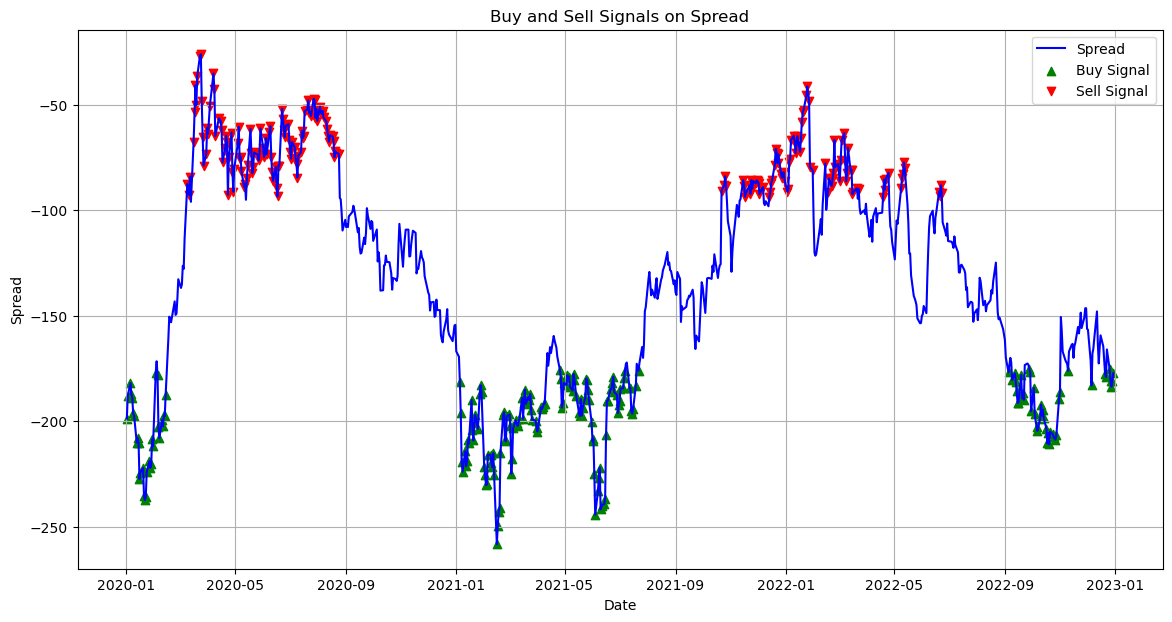

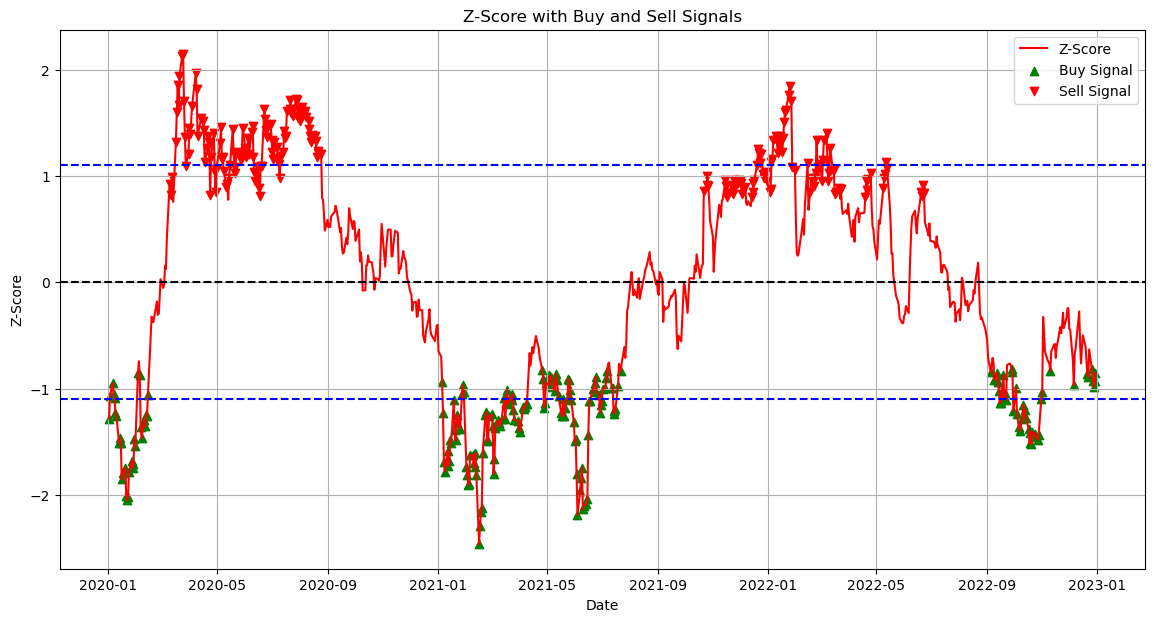

In [23]:
# Define buy and sell signals
data['Signal'] = 0
data.loc[data['Z-Score'] > 0.8, 'Signal'] = -1  # Sell signal
data.loc[data['Z-Score'] < -0.8, 'Signal'] = 1  # Buy signal

# Exiting positions
data['Exit Signal'] = 0
data.loc[(data['Z-Score'] > -0.2) & (data['Z-Score'] < 0.2), 'Exit Signal'] = 1

# Combine signals
data['Position'] = data['Signal']
data['Position'] = data['Position'].replace(to_replace=0, method='ffill')

# Reset position to 0 on exit signal
data.loc[data['Exit Signal'] == 1, 'Position'] = 0

# Plot buy and sell signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Spread'], label='Spread', color='blue')
plt.scatter(data.index[data['Signal'] == 1], data['Spread'][data['Signal'] == 1], label='Buy Signal', marker='^', color='green')
plt.scatter(data.index[data['Signal'] == -1], data['Spread'][data['Signal'] == -1], label='Sell Signal', marker='v', color='red')
plt.title('Buy and Sell Signals on Spread')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

# Plot Z-score with buy and sell signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Z-Score'], label='Z-Score', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1.1, color='blue', linestyle='--')
plt.axhline(-1.1, color='blue', linestyle='--')
plt.scatter(data.index[data['Signal'] == 1], data['Z-Score'][data['Signal'] == 1], label='Buy Signal', marker='^', color='green')
plt.scatter(data.index[data['Signal'] == -1], data['Z-Score'][data['Signal'] == -1], label='Sell Signal', marker='v', color='red')
plt.title('Z-Score with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
tickers

['HINDPETRO.NS', 'LICHSGFIN.NS']

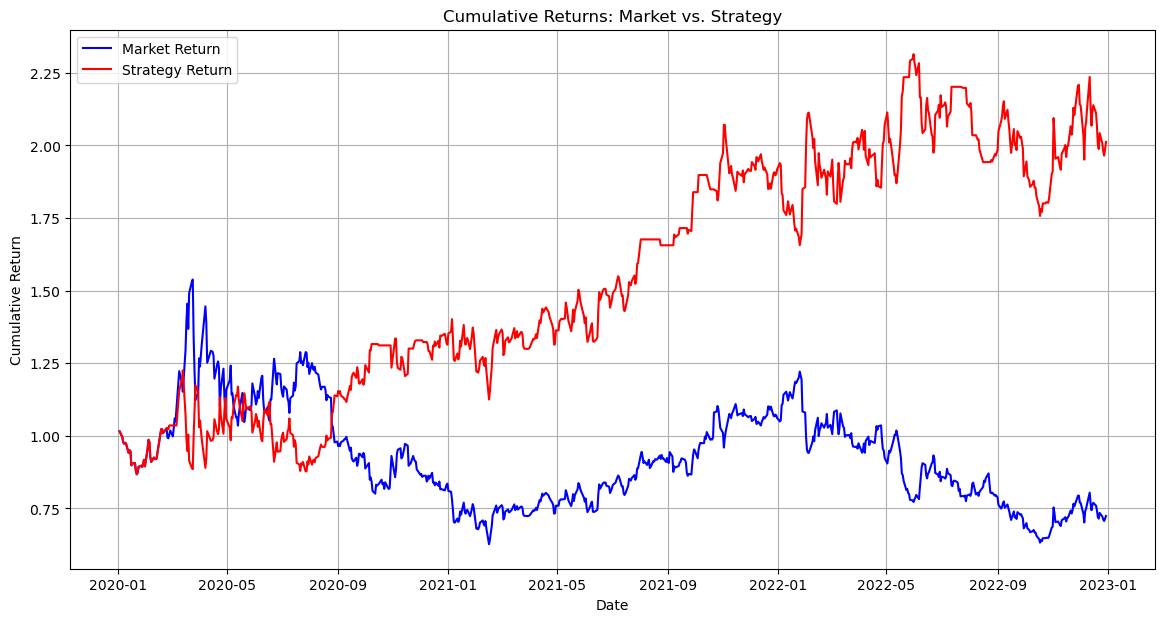

Final Market Return: -27.62%
Final Strategy Return: 101.19%


In [25]:
# Calculate returns
data['Return'] = data['Adj Close']['HINDPETRO.NS'].pct_change() - data['Adj Close']['LICHSGFIN.NS'].pct_change()

# Calculate strategy returns
data['Strategy Return'] = data['Return'] * data['Position'].shift(1)

# Calculate cumulative returns
data['Cumulative Return'] = (1 + data['Return']).cumprod()
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Market Return', color='blue')
plt.plot(data.index, data['Cumulative Strategy Return'], label='Strategy Return', color='red')
plt.title('Cumulative Returns: Market vs. Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Print final cumulative returns
market_return_percentage = data['Cumulative Return'].iloc[-1] * 100
strategy_return_percentage = data['Cumulative Strategy Return'].iloc[-1] * 100
print(f'Final Market Return: {-100+market_return_percentage:.2f}%')
print(f'Final Strategy Return: {-100+strategy_return_percentage:.2f}%')



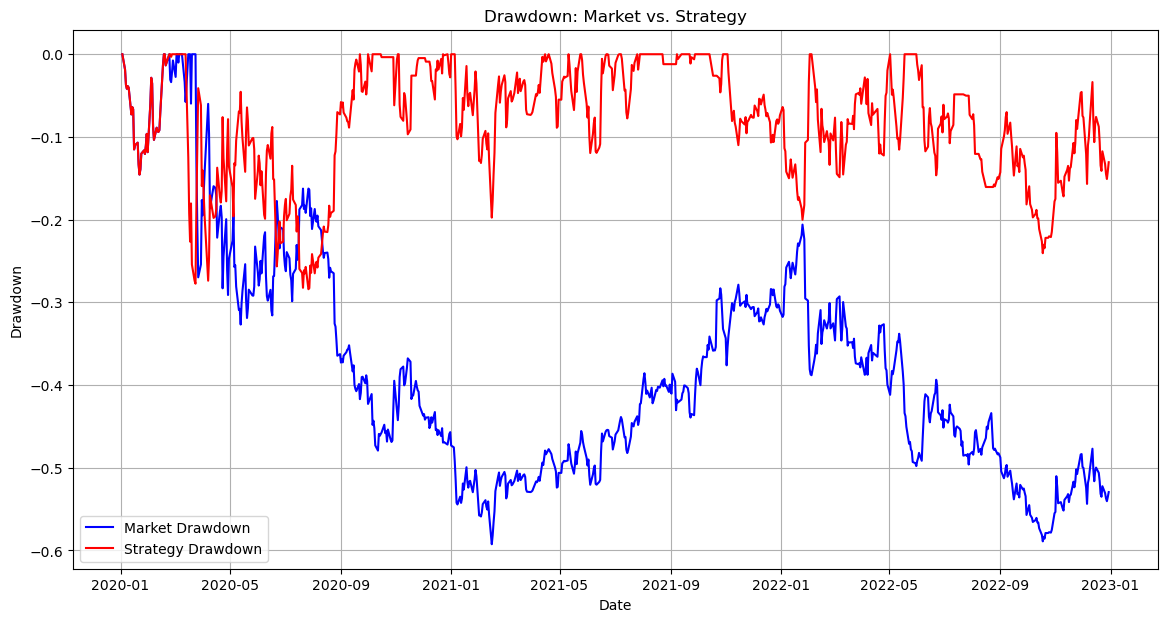

Maximum Market Drawdown: -59.25%
Maximum Strategy Drawdown: -28.42%


In [26]:
# Calculate drawdown for market return
data['Cumulative Return Peak'] = data['Cumulative Return'].cummax()
data['Drawdown'] = (data['Cumulative Return'] - data['Cumulative Return Peak']) / data['Cumulative Return Peak']

# Calculate drawdown for strategy return
data['Cumulative Strategy Return Peak'] = data['Cumulative Strategy Return'].cummax()
data['Strategy Drawdown'] = (data['Cumulative Strategy Return'] - data['Cumulative Strategy Return Peak']) / data['Cumulative Strategy Return Peak']

# Plot drawdown
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Drawdown'], label='Market Drawdown', color='blue')
plt.plot(data.index, data['Strategy Drawdown'], label='Strategy Drawdown', color='red')
plt.title('Drawdown: Market vs. Strategy')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

# Print maximum drawdown
max_market_drawdown = data['Drawdown'].min()
max_strategy_drawdown = data['Strategy Drawdown'].min()
print(f'Maximum Market Drawdown: {max_market_drawdown * 100:.2f}%')
print(f'Maximum Strategy Drawdown: {max_strategy_drawdown * 100:.2f}%')


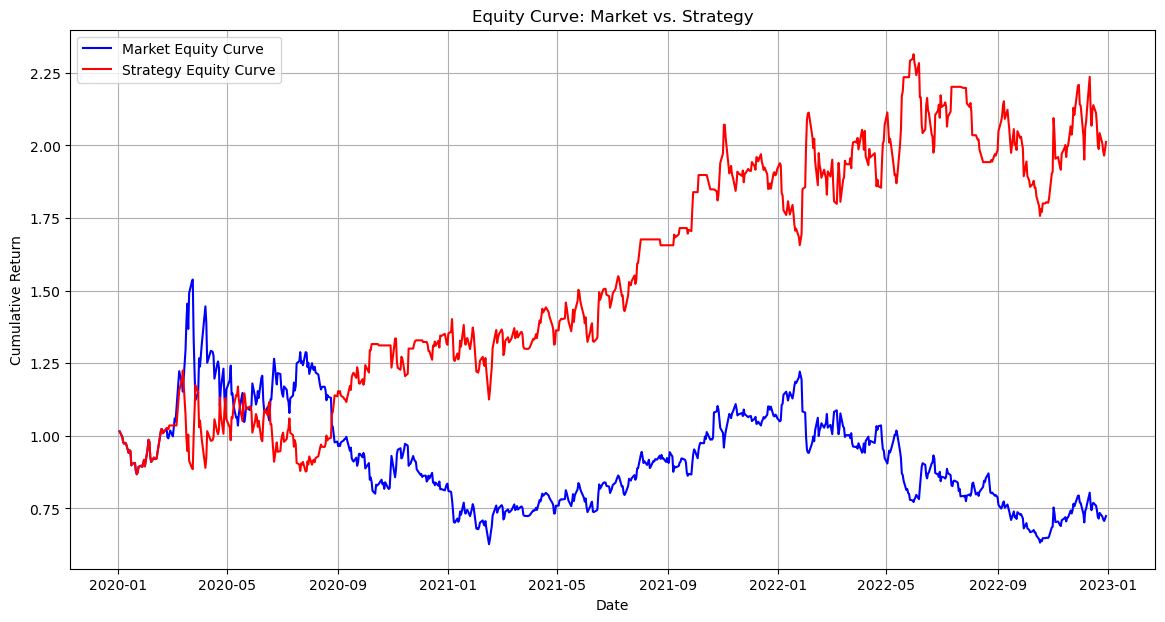

Final Market Return: -27.62%
Final Strategy Return: 101.19%


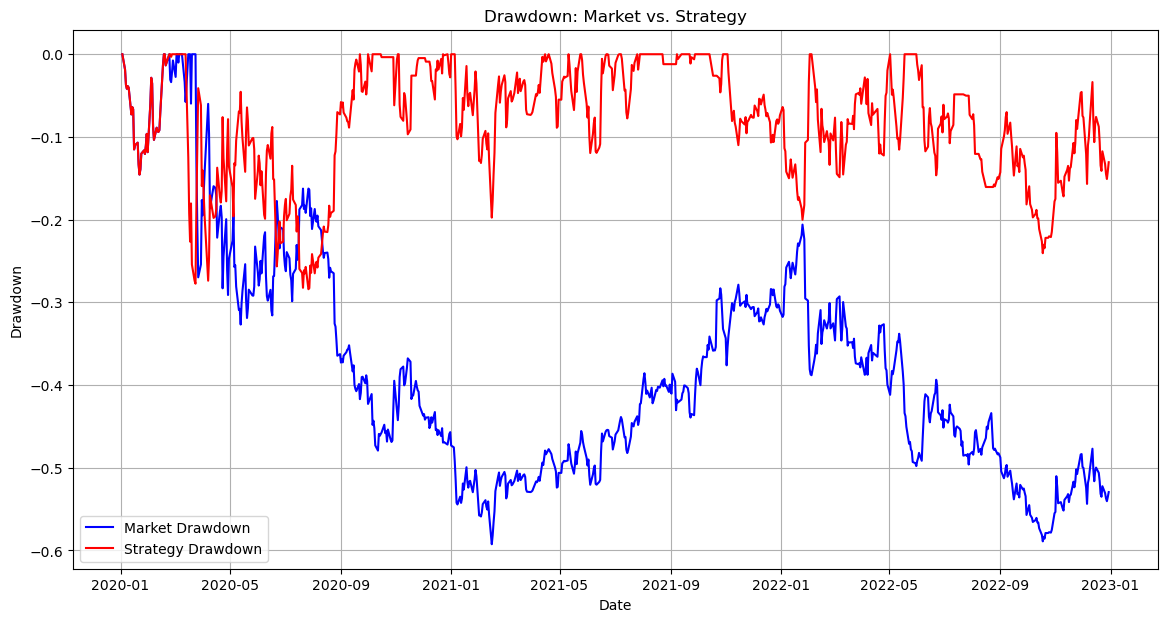

Maximum Market Drawdown: -59.25%
Maximum Strategy Drawdown: -28.42%


In [27]:
# Plot equity curves
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Market Equity Curve', color='blue')
plt.plot(data.index, data['Cumulative Strategy Return'], label='Strategy Equity Curve', color='red')
plt.title('Equity Curve: Market vs. Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Print final cumulative returns
market_return = data['Cumulative Return'].iloc[-1] - 1
strategy_return = data['Cumulative Strategy Return'].iloc[-1] - 1
print(f'Final Market Return: {market_return * 100:.2f}%')
print(f'Final Strategy Return: {strategy_return * 100:.2f}%')

# Calculate drawdown for market return
data['Cumulative Return Peak'] = data['Cumulative Return'].cummax()
data['Drawdown'] = (data['Cumulative Return'] - data['Cumulative Return Peak']) / data['Cumulative Return Peak']

# Calculate drawdown for strategy return
data['Cumulative Strategy Return Peak'] = data['Cumulative Strategy Return'].cummax()
data['Strategy Drawdown'] = (data['Cumulative Strategy Return'] - data['Cumulative Strategy Return Peak']) / data['Cumulative Strategy Return Peak']

# Plot drawdown
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Drawdown'], label='Market Drawdown', color='blue')
plt.plot(data.index, data['Strategy Drawdown'], label='Strategy Drawdown', color='red')
plt.title('Drawdown: Market vs. Strategy')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

# Print maximum drawdown
max_market_drawdown = data['Drawdown'].min()
max_strategy_drawdown = data['Strategy Drawdown'].min()
print(f'Maximum Market Drawdown: {max_market_drawdown * 100:.2f}%')
print(f'Maximum Strategy Drawdown: {max_strategy_drawdown * 100:.2f}%')


## Abstract of this code
* Correlation:
    * Correlation between HINDPETRO.NS and LICHSGFIN.NS: 0.634604540755584.
* Cointegration:
    * Cointegration test p-value: 0.42610590356848776.
* Performance metrics:
    * Mean Squared Error: 0.00020144449263917024
    * R-squared: 0.9173903641369632
* Maximum Market Drawdown: -59.25%
* Maximum Strategy Drawdown: -28.42%
* Final Market Return: -27.62%
* Final Strategy Return: 101.19%

